# Check hardware

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes

In [ ]:
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         8848008 kB
MemAvailable:   12498720 kB
Buffers:          225624 kB
Cached:          3577452 kB
SwapCached:            0 kB
Active:           391648 kB
Inactive:        3828876 kB
Active(anon):        916 kB
Inactive(anon):   392716 kB
Active(file):     390732 kB
Inactive(file):  3436160 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:             39716 kB
Writeback:             0 kB
AnonPages:        417632 kB
Mapped:           222588 kB
Shmem:              1200 kB
KReclaimable:     130540 kB
Slab:             159520 kB
SReclaimable:     130540 kB
SUnreclaim:        28980 kB
KernelStack:        4224 kB
PageTables:         6672 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2608668 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8952 kB
VmallocChunk:          0 kB
Percpu:          

# Setting up PySpark in Colab

## Method 1:

In [ ]:
# ! apt-get install openjdk-8-jdk-headless -qq > /dev/null
# ! wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
# ! tar xf spark-3.2.0-bin-hadoop3.2.tgz
# ! pip install -q findspark

In [ ]:
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
# import findspark
# findspark.init()
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()
# # Test the spark
# df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
# df.show(3, False)

## Method 2 to download package

In [ ]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 29 kB/s 
     |████████████████████████████████| 199 kB 43.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e861e9161294e66407057db110ff0cced4ce200921b7cb548499e66768eea33b
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
! ls -a

.  ..  .config	sample_data


# Muti-class text classification

## Check installation + Create new spark sesssion
The master option specifies the master URL for our distributed cluster which will run locally. We also specify the number of threads to 2. This allows our program to run 2 threads concurrently. It reduces the failure of our program.

In [ ]:
# Import a Spark function from library
import pyspark
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark import SparkContext 
from pyspark.sql.functions import *

sc = SparkContext(master="local[2]")
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [ ]:
spark = SparkSession.builder.appName("Muti-class text classification").getOrCreate()
spark

## Import library

In [ ]:
import numpy as np
import pandas as pd 
import datetime
import os
import random

from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()

## Download Udemy dataset

In [ ]:
# !gdown 1-TfybHeSWpP9UJLxeNDIFT1CPfxn7XWT
!gdown 1CoCiVw_PcrDK0BzllHb8qBKn6e9AMZMh

Downloading...
From: https://drive.google.com/uc?id=1CoCiVw_PcrDK0BzllHb8qBKn6e9AMZMh
To: /content/udemy_courses.csv
100% 694k/694k [00:00<00:00, 86.9MB/s]


In [ ]:
!ls

sample_data  udemy_courses.csv


## Load data

In [ ]:
start = datetime.datetime.now()
df = spark.read.csv("udemy_courses.csv",header=True,inferSchema=True)
print('total time that need to load the dataset: ', datetime.datetime.now() - start, 's')
df.show(5)

total time that need to load the dataset:  0:00:17.639276 s
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration|published_timestamp|         subject|
+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+-------------------+----------------+
|  1070968|Ultimate Investme...|https://www.udemy...|   true|  200|           2147|         23|          51|        All Levels|             1.5|2017-01-18 20:58:58|Business Finance|
|  1113822|Complete GST Cour...|https://www.udemy...|   true|   75|           2792|        923|         274|        All Levels|            39.0|2017-03-09 16:34:20|Business Finance|
|  1006314|Financial Modelin..

In [ ]:
df.columns

['course_id',
 'course_title',
 'url',
 'is_paid',
 'price',
 'num_subscribers',
 'num_reviews',
 'num_lectures',
 'level',
 'content_duration',
 'published_timestamp',
 'subject']

## EDA

### Basic information: size of dataframe, datatypes, columns

In [ ]:
print('Size of dataframe (row, col):  ', (df.count(),  len(df.columns)))

Size of dataframe (row, col):   (3683, 12)


In [ ]:
df.printSchema()

root
 |-- course_id: integer (nullable = true)
 |-- course_title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- is_paid: boolean (nullable = true)
 |-- price: integer (nullable = true)
 |-- num_subscribers: integer (nullable = true)
 |-- num_reviews: integer (nullable = true)
 |-- num_lectures: integer (nullable = true)
 |-- level: string (nullable = true)
 |-- content_duration: string (nullable = true)
 |-- published_timestamp: timestamp (nullable = true)
 |-- subject: string (nullable = true)



In [ ]:
df.toPandas().describe()

course_id        price  num_subscribers   num_reviews  num_lectures
count  3.683000e+03  3683.000000      3683.000000   3683.000000    3683.00000
mean   6.756596e+05    66.023622      3194.087972    156.063535      40.10372
std    3.433124e+05    60.982453      9498.061750    934.831762      50.35502
min    8.324000e+03     0.000000         0.000000      0.000000       0.00000
25%    4.068710e+05    20.000000       111.000000      4.000000      15.00000
50%    6.876420e+05    45.000000       912.000000     18.000000      25.00000
75%    9.608420e+05    95.000000      2537.500000     67.000000      46.00000
max    1.282064e+06   200.000000    268923.000000  27445.000000     779.00000

In [ ]:
df.toPandas().describe(include=['O'])

course_title  \
count                            3683   
unique                           3668   
top     Acoustic Blues Guitar Lessons   
freq                                3   

                                                      url       level  \
count                                                3683        3683   
unique                                               3677           4   
top     https://www.udemy.com/build-beautiful-html5-we...  All Levels   
freq                                                    2        1930   

       content_duration          subject  
count              3683             3678  
unique              110                4  
top                 1.0  Web Development  
freq                607             1200

### Check null value in each columns

In [ ]:
null_list = []
for i in df.columns:
  print('=============== ', i, '=============== ')
  null_count = df.toPandas()[i].isnull().sum()
  null_percent = (null_count/df.count())*100
  null_list.append(null_percent)
  print('number of null record in "',i,'" column:',null_count)
  print('percentage of null record  in "',i,'" column:',null_percent,'%','\n\n')

===============  course_id =============== 
number of null record in " course_id " column: 0
percentage of null record  in " course_id " column: 0.0 % 


===============  course_title =============== 
number of null record in " course_title " column: 0
percentage of null record  in " course_title " column: 0.0 % 


===============  url =============== 
number of null record in " url " column: 0
percentage of null record  in " url " column: 0.0 % 


===============  is_paid =============== 
number of null record in " is_paid " column: 0
percentage of null record  in " is_paid " column: 0.0 % 


===============  price =============== 
number of null record in " price " column: 0
percentage of null record  in " price " column: 0.0 % 


===============  num_subscribers =============== 
number of null record in " num_subscribers " column: 0
percentage of null record  in " num_subscribers " column: 0.0 % 


===============  num_reviews =============== 
number of null record in " num_reviews 

### Extensive visualization

In [ ]:
# convert to pandas dataframe to do the visualization
df2 = df.toPandas()
df2 = df2.dropna()
df2 = df2.astype({'content_duration': 'float'})

#### Number of courses belong to each subject and number of Udemy courses by year from 2011-2017

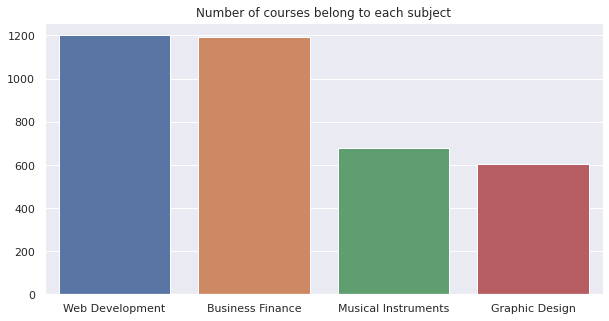

In [ ]:
### subject distribution 
sns.set(rc={'figure.figsize':(10,5)})
tar = df2['subject'].value_counts()
ax = sns.barplot(x=tar.index, y=tar.values).set(title='Number of courses belong to each subject')

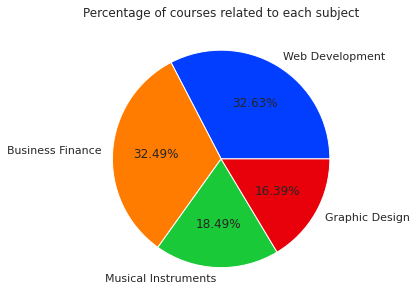

In [ ]:
tar = df2['subject'].value_counts()/df2.shape[0]*100
palette_color = sns.color_palette('bright')
plt.pie(tar.values, labels=tar.index, colors=palette_color, autopct='%.2f%%')
plt.title('Percentage of courses related to each subject')
plt.show()

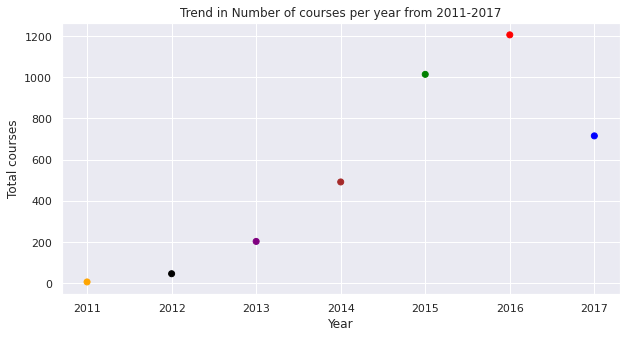

In [ ]:
tmp = df2['published_timestamp'].apply(lambda x: x.year).value_counts()
plt.scatter(tmp.index, tmp.values, c=np.array(["red","green","blue","brown","purple","black","orange"]))
# plt.plot(tmp.index, tmp.values,zorder=10)
plt.xlabel("Year")
plt.ylabel("Total courses")
plt.title("Trend in Number of courses per year from 2011-2017")
plt.show()  # show first chart

#### Distribution plot to examine numerical features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



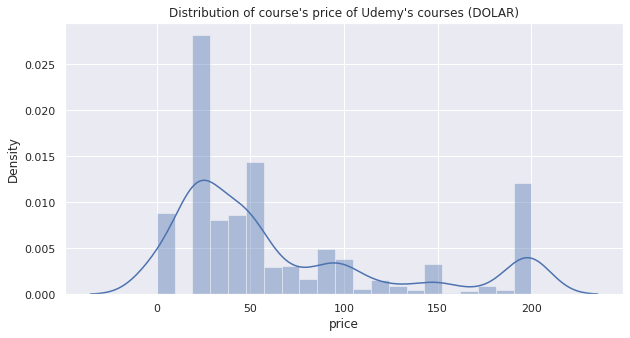

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of course's price of Udemy's courses (DOLAR)")
ax = sns.distplot(df2["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



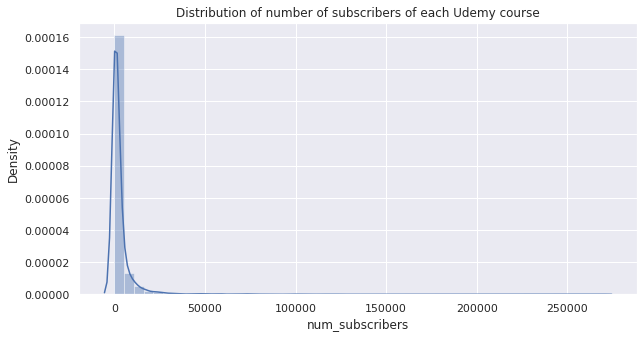

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of number of subscribers of each Udemy course")
ax = sns.distplot(df2["num_subscribers"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



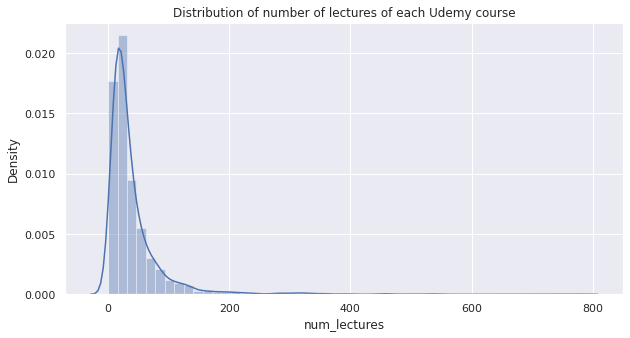

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of number of lectures of each Udemy course")
ax = sns.distplot(df2["num_lectures"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



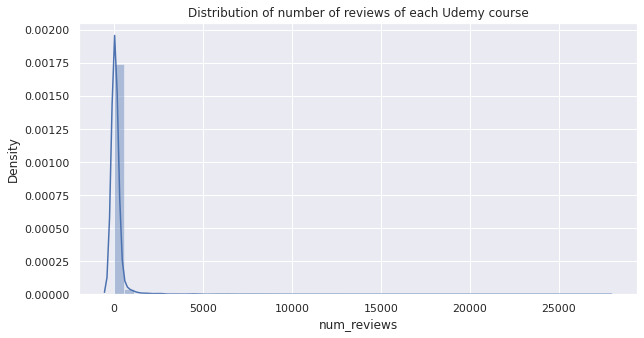

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of number of reviews of each Udemy course")
ax = sns.distplot(df2["num_reviews"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



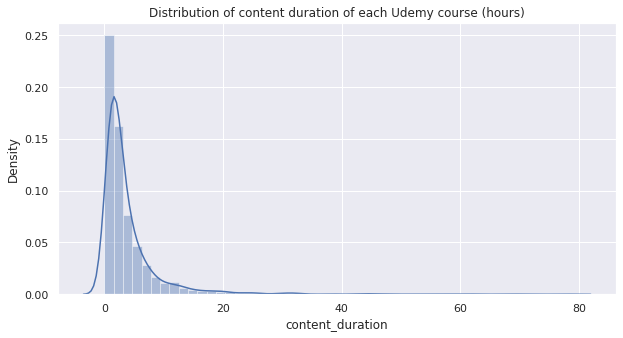

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Distribution of content duration of each Udemy course (hours)")
ax = sns.distplot(df2["content_duration"])

#### Boxplot visualization

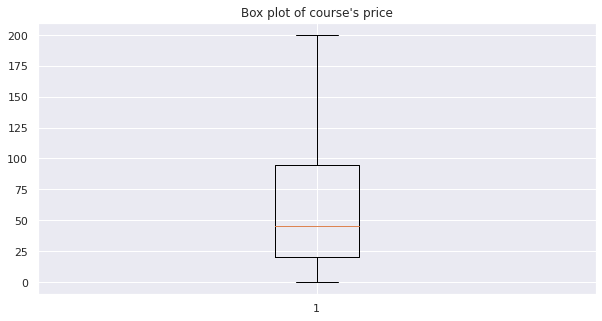

In [ ]:
plt.boxplot(df2["price"])
plt.title("Box plot of course's price")
plt.show()

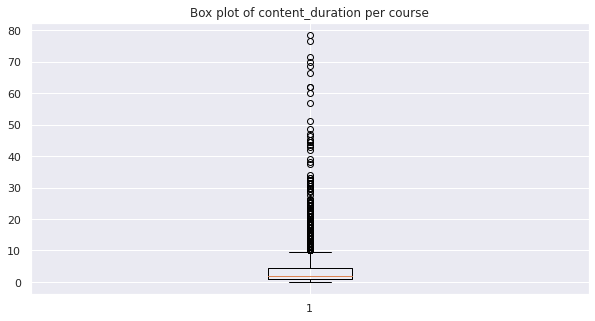

In [ ]:
plt.boxplot(df2["content_duration"])
plt.title("Box plot of content_duration per course")
plt.show()

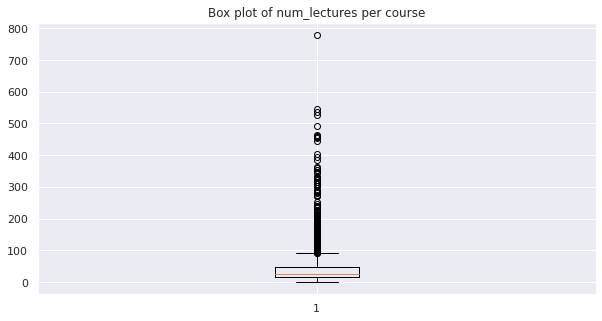

In [ ]:
plt.boxplot(df2["num_lectures"])
plt.title("Box plot of num_lectures per course")
plt.show()

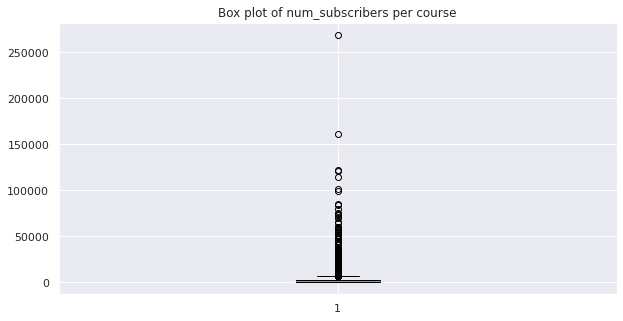

In [ ]:
plt.boxplot(df2["num_subscribers"])
plt.title("Box plot of num_subscribers per course")
plt.show()

#### Pie chart visualization

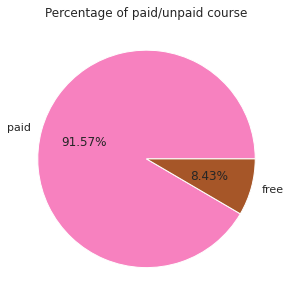

In [ ]:
tar = df2['is_paid'].value_counts()/df2.shape[0]*100
palette_color = sns.color_palette('Set1_r')
plt.pie(tar.values, labels=['paid','free'], colors=palette_color, autopct='%.2f%%')
plt.title('Percentage of paid/unpaid course')
plt.show()

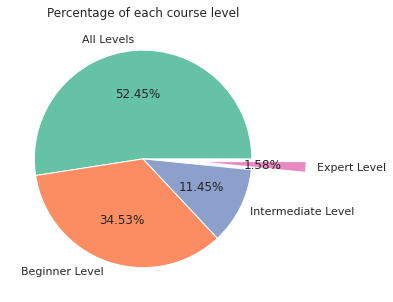

In [ ]:
tar = df2['level'].value_counts()/df2.shape[0]*100
palette_color = sns.color_palette('Set2')
explode = [0, 0, 0, 0.5]
plt.pie(tar.values, labels=tar.index, colors=palette_color, autopct='%.2f%%', explode=explode)
plt.title('Percentage of each course level')
plt.show()

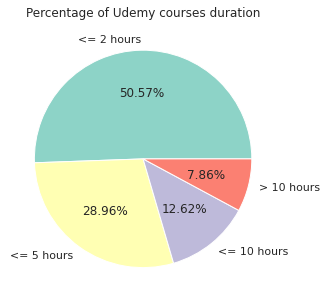

In [ ]:
a = b = c = d = 0
for i in range(df2['content_duration'].shape[0]):
  if df2['content_duration'].iloc[i] <= 2:
    a += 1
  elif df2['content_duration'].iloc[i] <= 5:
    b += 1
  elif df2['content_duration'].iloc[i] <= 10:
    c += 1
  else:
    d += 1
a /= df2.shape[0]
b /= df2.shape[0]
c /= df2.shape[0]
d /= df2.shape[0]
value = [a,b,c,d]  
label = ['<= 2 hours','<= 5 hours','<= 10 hours','> 10 hours']
palette_color = sns.color_palette('Set3')
plt.pie(value, labels=label, colors=palette_color, autopct='%.2f%%')
plt.title('Percentage of Udemy courses duration')
plt.show()

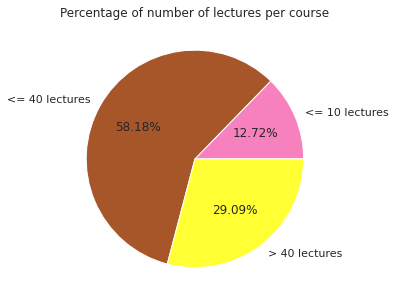

In [ ]:
a = b = c = 0
for i in range(df2['num_lectures'].shape[0]):
  if df2['num_lectures'].iloc[i] <= 10:
    a += 1
  elif df2['num_lectures'].iloc[i] <= 40:
    b += 1
  else:
    c += 1
a /= df2.shape[0]
b /= df2.shape[0]
c /= df2.shape[0]
value = [a,b,c]  
label = ['<= 10 lectures','<= 40 lectures','> 40 lectures']
palette_color = sns.color_palette('Set1_r')
plt.pie(value, labels=label, colors=palette_color, autopct='%.2f%%')
plt.title('Percentage of number of lectures per course')
plt.show()

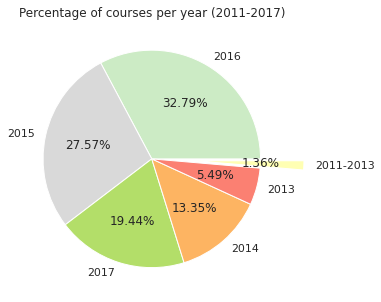

In [ ]:
tmp = df2['published_timestamp'].apply(lambda x: x.year).value_counts()
tar = tmp/df2.shape[0]*100
label = list(tar.index[:-2])
label = [str(i) for i in label] 
label.append('2011-2013')
value = list(tar.values[:-2])
value.append(tar.values[-1]+tar.values[-2])

palette_color = sns.color_palette('Set3_r')
plt.pie(value, labels=label, colors=palette_color, autopct='%.2f%%', explode=[0, 0, 0, 0, 0, 0.4])
plt.title('Percentage of courses per year (2011-2017)')
plt.show()

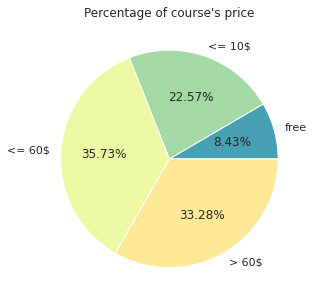

In [ ]:
a = b = c = d = 0
for i in range(df2['price'].shape[0]):
  if df2['price'].iloc[i] == 0:
    a += 1
  elif df2['price'].iloc[i] <= 20:
    b += 1
  elif df2['price'].iloc[i] <= 60:
    c += 1
  else:
    d += 1
a /= df2.shape[0]
b /= df2.shape[0]
c /= df2.shape[0]
d /= df2.shape[0]
value = [a,b,c,d]  
label = ['free','<= 10$','<= 60$','> 60$']
palette_color = sns.color_palette('Spectral_r')
plt.pie(value, labels=label, colors=palette_color, autopct='%.2f%%')
plt.title("Percentage of course's price")
plt.show()

#### Histogram

[Text(0.5, 1.0, 'Course title word count distribution')]

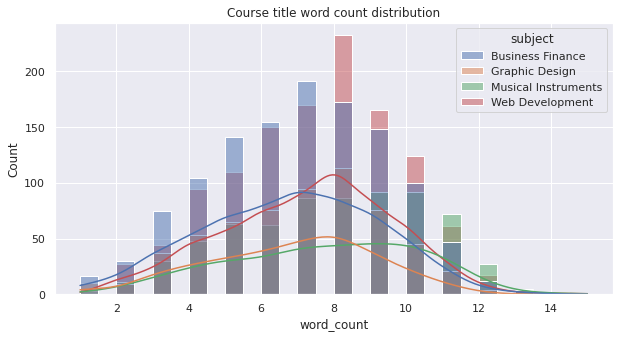

In [ ]:
df2['word_count'] = df2['course_title'].apply(lambda x: len(str(x).split()))
sns.histplot(data=df2, x="word_count", kde=True,hue="subject").set(title="Course title word count distribution")

#### Bar chart to explore text data in `course_title` column

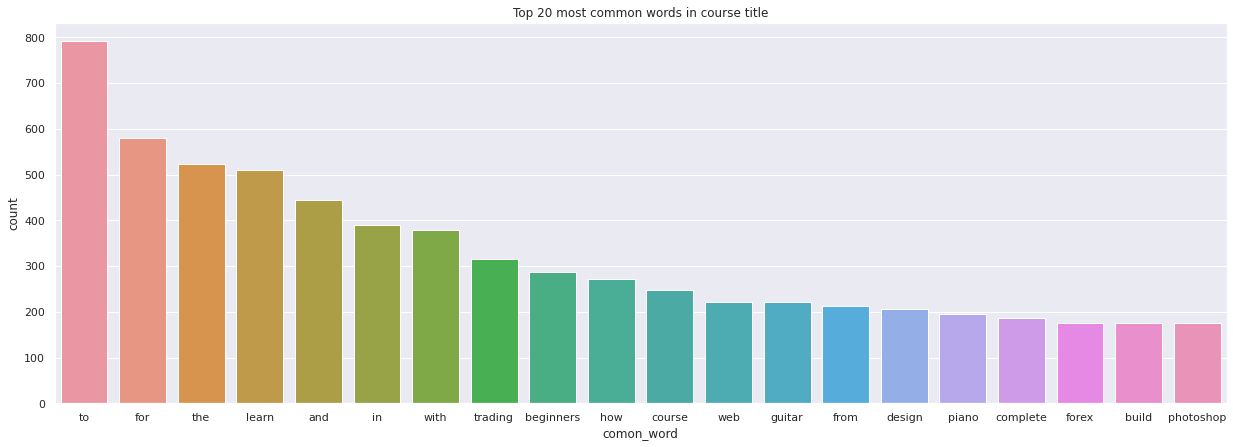

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df2['course_title'], 20)

tmp = pd.DataFrame(common_words, columns = ['comon_word', 'count'])
plt.figure(figsize=(21,7))
ax = sns.barplot(data=tmp, x="comon_word", y="count").set(title="Top 20 most common words in course title")

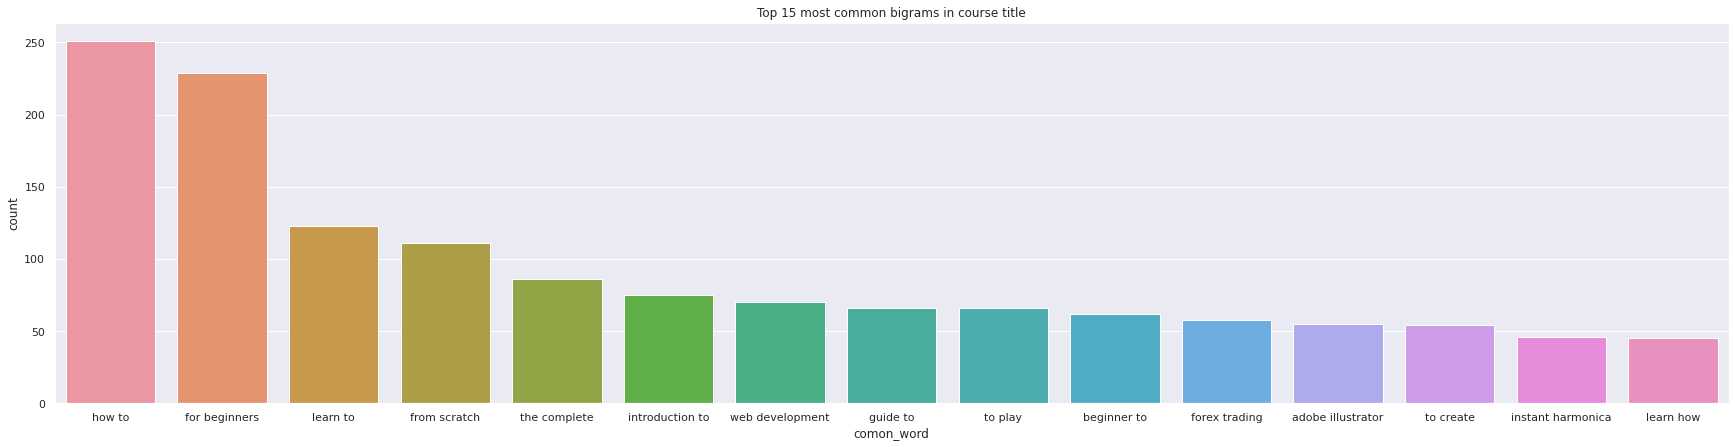

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df2['course_title'], 15)

tmp = pd.DataFrame(common_words, columns = ['comon_word', 'count'])
plt.figure(figsize=(30,7))
ax = sns.barplot(data=tmp, x="comon_word", y="count").set(title="Top 15 most common bigrams in course title")

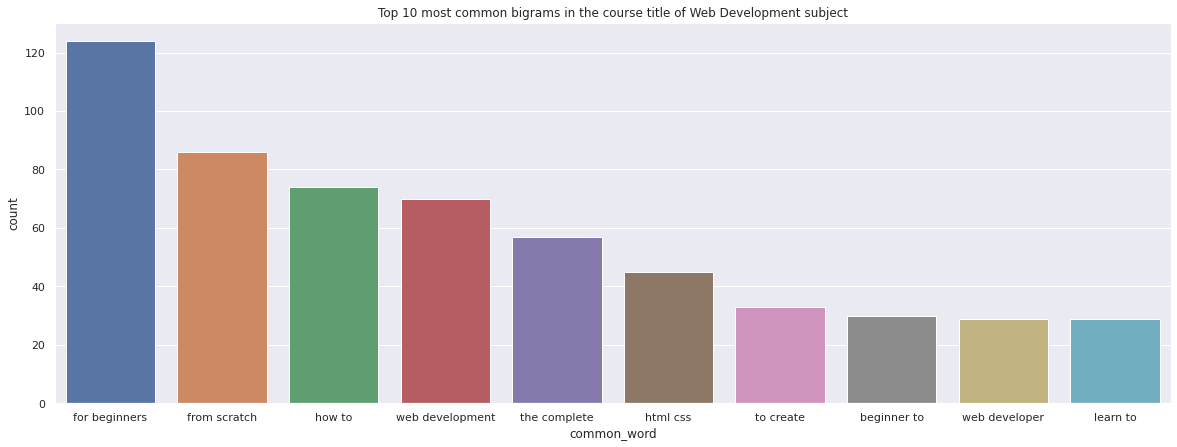

In [ ]:
common_words = get_top_n_bigram(df2[df2['subject']=='Web Development']['course_title'], 10)

tmp = pd.DataFrame(common_words, columns = ['common_word', 'count'])
plt.figure(figsize=(20,7))
ax = sns.barplot(data=tmp, x="common_word", y="count").set(title="Top 10 most common bigrams in the course title of Web Development subject")

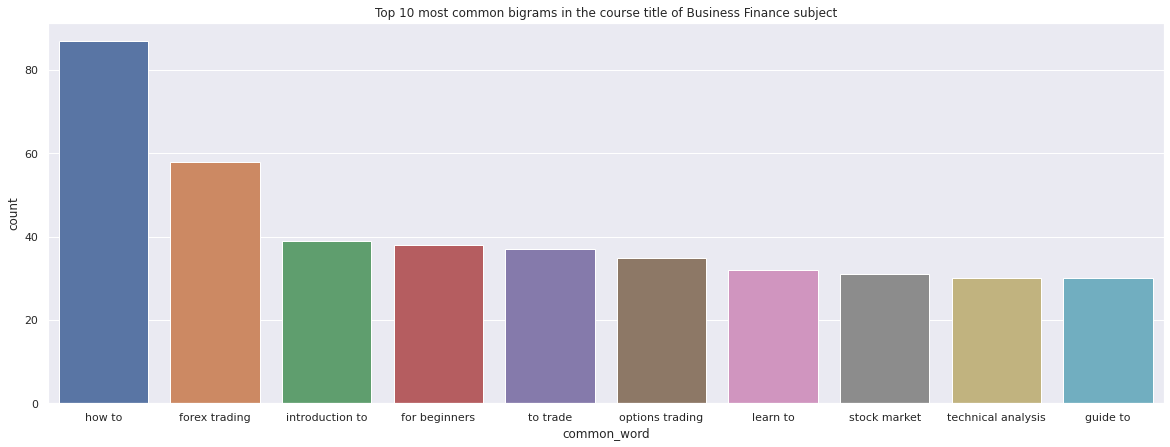

In [ ]:
common_words = get_top_n_bigram(df2[df2['subject']=='Business Finance']['course_title'], 10)

tmp = pd.DataFrame(common_words, columns = ['common_word', 'count'])
plt.figure(figsize=(20,7))
ax = sns.barplot(data=tmp, x="common_word", y="count").set(title="Top 10 most common bigrams in the course title of Business Finance subject")

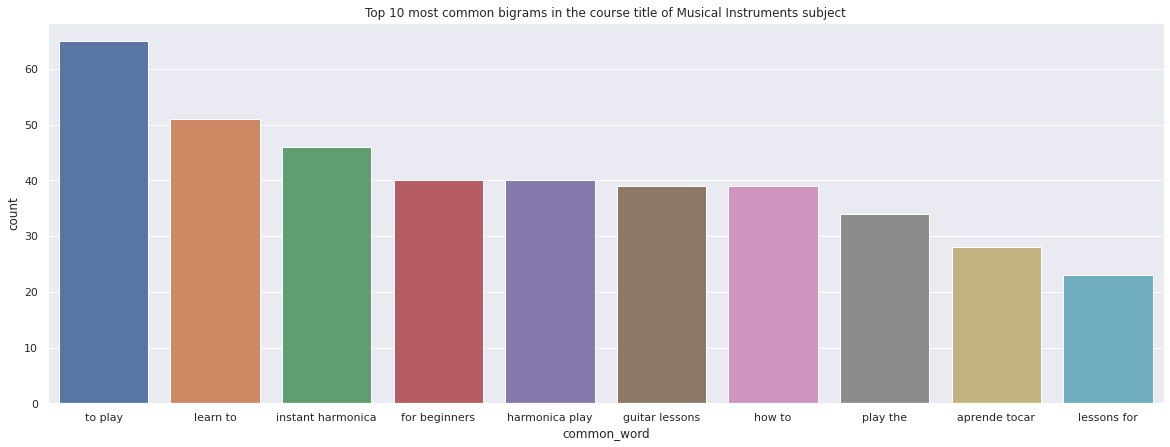

In [ ]:
common_words = get_top_n_bigram(df2[df2['subject']=='Musical Instruments']['course_title'], 10)

tmp = pd.DataFrame(common_words, columns = ['common_word', 'count'])
plt.figure(figsize=(20,7))
ax = sns.barplot(data=tmp, x="common_word", y="count").set(title="Top 10 most common bigrams in the course title of Musical Instruments subject")

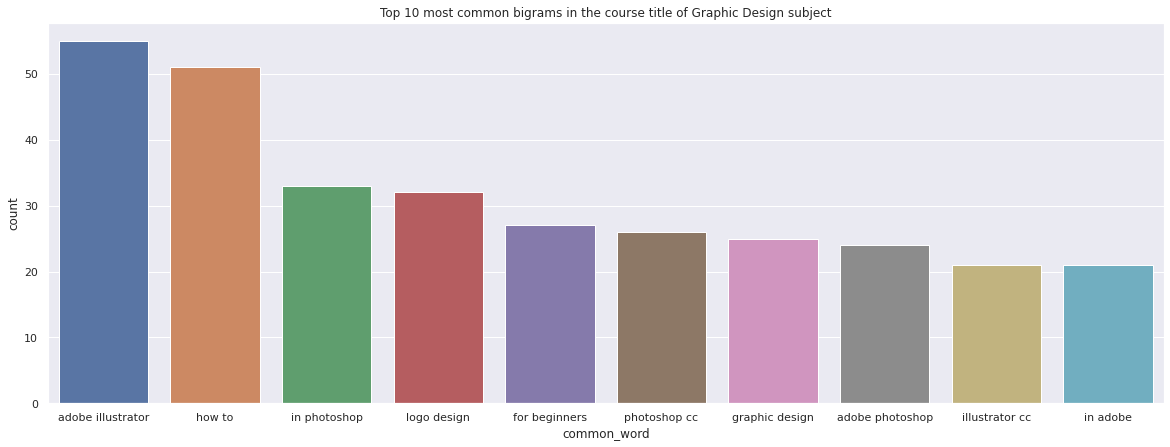

In [ ]:
common_words = get_top_n_bigram(df2[df2['subject']=='Graphic Design']['course_title'], 10)

tmp = pd.DataFrame(common_words, columns = ['common_word', 'count'])
plt.figure(figsize=(20,7))
ax = sns.barplot(data=tmp, x="common_word", y="count").set(title="Top 10 most common bigrams in the course title of Graphic Design subject")

## Feature engineering

### Feature selection: We select the `course_title` and `subject` columns. These are the columns we will use in building our model.

In [ ]:
df = df.select('course_title','subject')
df.show(5)

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
+--------------------+----------------+
only showing top 5 rows



### Check and process null value 

In [ ]:
null_count = df.toPandas()['subject'].isnull().sum()
null_percent = (null_count/df.count())*100
print('number of null record in subject column:',null_count)
print('percentage of null record  in subject column:',null_percent,'%')

number of null record in subject column: 5
percentage of null record  in subject column: 0.13575889220743959 %


In [ ]:
null_count = df.toPandas()['course_title'].isnull().sum()
null_percent = (null_count/df.count())*100
print('number of null record in course_title column:',null_count)
print('percentage of null record  in course_title column:',null_percent,'%')

number of null record in course_title column: 0
percentage of null record  in course_title column: 0.0 %


In [ ]:
# too small percentage -> drop
df = df.dropna(subset=('subject'))

### Show features provided by PySpark MLlib

In [ ]:
import pyspark.ml.feature
dir(pyspark.ml.feature)

['Any',
 'Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'DataFrame',
 'DenseMatrix',
 'DenseVector',
 'Dict',
 'ElementwiseProduct',
 'FeatureHasher',
 'Generic',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JM',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'List',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'Optional',
 'P',
 'PCA',
 'PCAModel',
 'Param',
 '

### Tokenize -> remove stop word -> vectorize (idf) -> encoding label

In [ ]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF
from pyspark.ml.feature import StringIndexer

In [ ]:
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)

In [ ]:
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

In [ ]:
df = labelEncoder.transform(df)
df.show(5)

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



In [ ]:
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

## Modeling

### Split into training and testing set with different ratio

In [ ]:
(trainDF,testDF) = df.randomSplit((0.75,0.25),seed=27)

In [ ]:
(trainDF2,testDF2) = df.randomSplit((0.5,0.5),seed=72)

### Define classification algorithm (Logistic regression, Decision tree, Random forest,...)

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import RandomForestClassifier


nb = NaiveBayes(smoothing=1.0, modelType="multinomial",featuresCol='vectorizedFeatures',labelCol='label')
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')
dt = DecisionTreeClassifier(featuresCol='vectorizedFeatures',labelCol='label',maxDepth=30)
mlp = MultilayerPerceptronClassifier(maxIter=50, layers=[3765,15,4], blockSize=128, seed=1234, featuresCol='vectorizedFeatures',labelCol='label',)
rfc = RandomForestClassifier(featuresCol='vectorizedFeatures',labelCol='label', numTrees=10,maxDepth=30)
classifiers = [nb,lr,dt,mlp,rfc] # 

### Define ML pipeline + training (75%)

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
pipeline = [] 
model = []
for i in range(len(classifiers)):
  start = datetime.datetime.now()
  pipeline.append(Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,classifiers[i]]))
  model.append(pipeline[i].fit(trainDF))
  end = datetime.datetime.now()
  if i == 0:
    print('total time need to train Naive Bayes: ', end - start, ' (s)\n')
  elif i == 1:
    print('total time need to train Logistic Regression: ', end - start, ' (s)\n')
  elif i == 2:
    print('total time need to train Decision Tree: ', end - start, ' (s)\n')
  elif i==3:
    print('total time need to train Multilayer (3 layers) Perceptron: ', end - start, ' (s)\n')
  else:
    print('total time need to train Random Forest (72 trees): ', end - start, ' (s)\n')

total time need to train Naive Bayes:  0:00:06.235801  (s)

total time need to train Logistic Regression:  0:00:08.625545  (s)

total time need to train Decision Tree:  0:00:12.985288  (s)

total time need to train Multilayer (3 layers) Perceptron:  0:00:14.598603  (s)

total time need to train Random Forest (72 trees):  0:00:09.489853  (s)



In [ ]:
predictions = []
for i in range(len(model)):
  if i == 0:
    print('======= Naive Bayes =========')
  elif i == 1:
    print('======= Logistic Regression =========')
  elif i == 2:
    print('======= Decision Tree =========')
  elif i==3:
    print('======= Multilayer (3 layers) Perceptron ========')
  else:
    print('======= Random Forest (72 trees) =========')
  predictions.append(model[i].transform(testDF))
  predictions[i].show(3)
  print('\n')

======= Naive Bayes =========
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#1 Piano Hand Coo...|Musical Instruments|  2.0|[#1, piano, hand,...|[#1, piano, hand,...|(3765,[10,14,190,...|(3765,[10,14,190,...|[-493.18545479425...|[1.11975930901261...|       2.0|
|#10 Hand Coordina...|Musical Instruments|  2.0|[#10, hand, coord...|[#10, hand, coord...|(3765,[0,4,277,33...|(3765,[0,4,277,33...|[-489.55198479289...|[9.58331470409147...|       2.0|
|#7 Piano Hand Coo...|Musical Instrument

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
accuracy = []
f1 = []
precision = []
recall = []
for i in range(len(model)):
  if i == 0:
    print('======= Naive Bayes =========')
  elif i == 1:
    print('======= Logistic Regression =========')
  elif i == 2:
    print('======= Decision Tree =========')
  elif i == 3:
    print('======= Multilayer (3 layers) Perceptron ========')
  else:
    print('======= Random Forest (72 trees) =========')
  evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')
  evaluator2 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='precisionByLabel')
  evaluator3 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='recallByLabel')
  evaluator4 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='f1')
  accuracy.append(evaluator.evaluate(predictions[i]))
  precision.append(evaluator2.evaluate(predictions[i]))
  recall.append(evaluator3.evaluate(predictions[i]))
  f1.append(evaluator4.evaluate(predictions[i]))
  print('testing accuracy: ',accuracy[i])
  print('testing precision: ',precision[i])
  print('testing recall: ',recall[i])
  print('testing f1-score: ',f1[i])
  print('\n')


======= Naive Bayes =========
testing accuracy:  0.9299163179916318
testing precision:  0.9102564102564102
testing recall:  0.9627118644067797
testing f1-score:  0.9298137482406317


======= Logistic Regression =========
testing accuracy:  0.9257322175732218
testing precision:  0.9647887323943662
testing recall:  0.9288135593220339
testing f1-score:  0.9256728046261733


======= Decision Tree =========
testing accuracy:  0.801255230125523
testing precision:  0.9688888888888889
testing recall:  0.7389830508474576
testing f1-score:  0.8052110692485526


======= Multilayer (3 layers) Perceptron ========
testing accuracy:  0.9382845188284519
testing precision:  0.958904109589041
testing recall:  0.9491525423728814
testing f1-score:  0.9377841579538027


======= Random Forest (72 trees) =========
testing accuracy:  0.8179916317991632
testing precision:  0.6487695749440716
testing recall:  0.9830508474576272
testing f1-score:  0.8220322132159252




### Define ML pipeline + training (50%)

In [ ]:
tokenizer2 = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover2 = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer2 = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf2 = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LinearSVC

nb2 = NaiveBayes(smoothing=1.0, modelType="multinomial",featuresCol='vectorizedFeatures',labelCol='label')
lr2 = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')
dt2 = DecisionTreeClassifier(featuresCol='vectorizedFeatures',labelCol='label',maxDepth=30)
mlp2 = MultilayerPerceptronClassifier(maxIter=50, layers=[2900,15,4], blockSize=128, seed=1234, featuresCol='vectorizedFeatures',labelCol='label')
rfc2 = RandomForestClassifier(featuresCol='vectorizedFeatures',labelCol='label', numTrees=10,maxDepth=30)
classifiers2 = [nb2,lr2,dt2,mlp2,rfc2] # 

In [ ]:
pipeline2 = [] 
model2 = []
for i in range(len(classifiers2)):
  start = datetime.datetime.now()
  pipeline2.append(Pipeline(stages=[tokenizer2,stopwords_remover2,vectorizer2,idf2,classifiers2[i]]))
  model2.append(pipeline2[i].fit(trainDF2))
  end = datetime.datetime.now()
  if i == 0:
    print('total time need to train Naive Bayes: ', end - start, ' (s)\n')
  elif i == 1:
    print('total time need to train Logistic Regression: ', end - start, ' (s)\n')
  elif i == 2:
    print('total time need to train Decision Tree: ', end - start, ' (s)\n')
  elif i==3:
    print('total time need to train Multilayer (3 layers) Perceptron: ', end - start, ' (s)\n')
  else:
    print('total time need to train Random Forest (72 trees): ', end - start, ' (s)\n')

total time need to train Naive Bayes:  0:00:01.554783  (s)

total time need to train Logistic Regression:  0:00:04.046573  (s)

total time need to train Decision Tree:  0:00:05.667380  (s)

total time need to train Multilayer (3 layers) Perceptron:  0:00:05.889601  (s)

total time need to train Random Forest (72 trees):  0:00:06.010514  (s)



In [ ]:
predictions2 = []
for i in range(len(model2)):
  predictions2.append(model2[i].transform(testDF2))

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
accuracy2 = []
f12 = []
precision2 = []
recall2 = []
for i in range(len(model2)):
  if i == 0:
    print('======= Naive Bayes =========')
  elif i == 1:
    print('======= Logistic Regression =========')
  elif i == 2:
    print('======= Decision Tree =========')
  elif i == 3:
    print('======= Multilayer (3 layers) Perceptron ========')
  else:
    print('======= Random Forest (72 trees) =========')
  evaluator_2 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')
  evaluator2_2 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='precisionByLabel')
  evaluator3_2 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='recallByLabel')
  evaluator4_2 = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='f1')
  accuracy2.append(evaluator_2.evaluate(predictions2[i]))
  precision2.append(evaluator2_2.evaluate(predictions2[i]))
  recall2.append(evaluator3_2.evaluate(predictions2[i]))
  f12.append(evaluator4_2.evaluate(predictions2[i]))
  print('testing accuracy: ',accuracy2[i])
  print('testing precision: ',precision2[i])
  print('testing recall: ',recall2[i])
  print('testing f1-score: ',f12[i])
  print('\n')


======= Naive Bayes =========
testing accuracy:  0.9295392953929539
testing precision:  0.8946540880503144
testing recall:  0.967687074829932
testing f1-score:  0.9295846009596185


======= Logistic Regression =========
testing accuracy:  0.9192411924119241
testing precision:  0.9516407599309153
testing recall:  0.9370748299319728
testing f1-score:  0.9187607458854321


======= Decision Tree =========
testing accuracy:  0.7934959349593496
testing precision:  0.8931451612903226
testing recall:  0.7534013605442177
testing f1-score:  0.795178187199025


======= Multilayer (3 layers) Perceptron ========
testing accuracy:  0.9436314363143632
testing precision:  0.945364238410596
testing recall:  0.9710884353741497
testing f1-score:  0.9431474594745972


======= Random Forest (72 trees) =========
testing accuracy:  0.8655826558265582
testing precision:  0.8810289389067524
testing recall:  0.9319727891156463
testing f1-score:  0.8633431362284631




### Explain Clasification result + Draw confusion matrix:
- Random forest is a very good, robust and versatile method, however it’s no mystery that for high-dimensional sparse data it’s not the best choice.
- Check which model make wrong classfication on which case

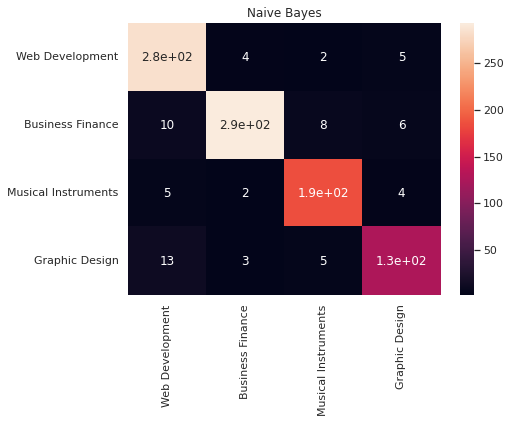

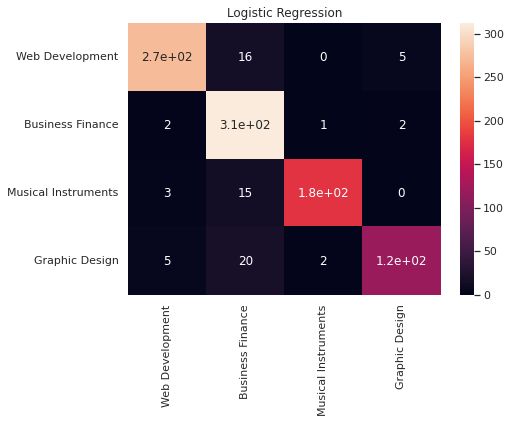

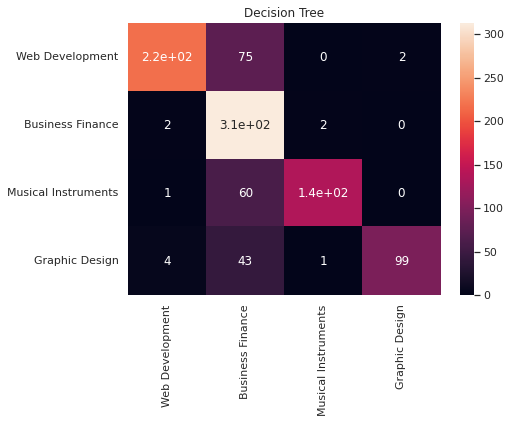

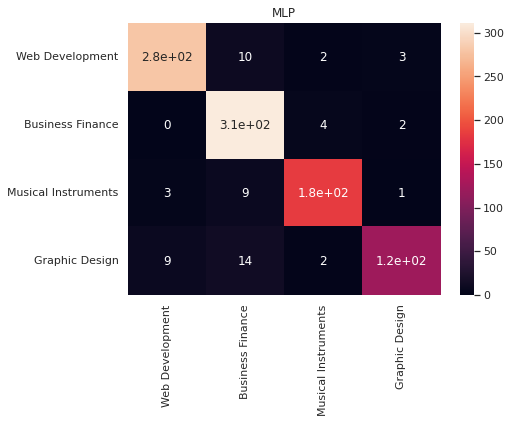

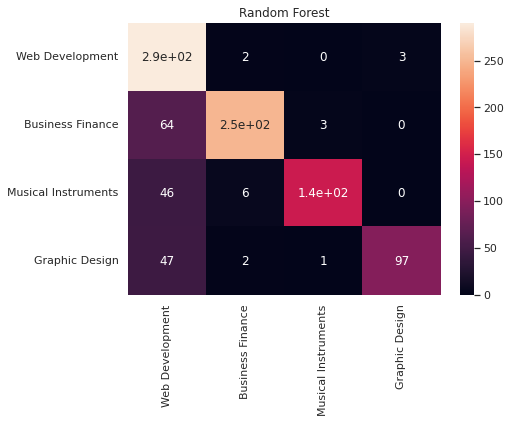

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

for i in range(len(predictions)):
  y_pred=predictions[i].select("prediction").collect()
  y_orig=predictions[i].select("label").collect()
  cm = confusion_matrix(y_orig, y_pred)
  df_cm = pd.DataFrame(cm, index = [i for i in ['Web Development','Business Finance', 'Musical Instruments', 'Graphic Design']],
                  columns = [i for i in ['Web Development','Business Finance', 'Musical Instruments', 'Graphic Design']])
  plt.figure(figsize = (7,5))
  if i == 0:
    sns.heatmap(df_cm, annot=True).set(title='Naive Bayes')
  elif i == 1:
    sns.heatmap(df_cm, annot=True).set(title='Logistic Regression')
  elif i == 2:
    sns.heatmap(df_cm, annot=True).set(title='Decision Tree')
  elif i == 3:
    sns.heatmap(df_cm, annot=True).set(title='MLP')
  else:
    sns.heatmap(df_cm, annot=True).set(title='Random Forest')
  # print(plot_confusion_matrix(cm),'\n\n')

## Custom/Personal test on models that train on 75% of data

In [ ]:
from pyspark.sql.types import StringType

ex = spark.createDataFrame([
    ("Building Machine Learning Apps with Python and PySpark",StringType()),
    ("Principle of Programming language",StringType()),
    ("Microservices Application development",StringType()),
    ("Introduction to Banking system",StringType()),
    ("International Monetery system",StringType()),
    ("Piano or Violin ?",StringType()),
    ("Logo Design Fundamentals",StringType()),
], ["course_title"] )
ex.show(truncate=False)

+------------------------------------------------------+---+
|course_title                                          |_2 |
+------------------------------------------------------+---+
|Building Machine Learning Apps with Python and PySpark|{} |
|Principle of Programming language                     |{} |
|Microservices Application development                 |{} |
|Introduction to Banking system                        |{} |
|International Monetery system                         |{} |
|Piano or Violin ?                                     |{} |
|Logo Design Fundamentals                              |{} |
+------------------------------------------------------+---+



In [ ]:
label_dict

{'Web Development': 0.0,
 'Business Finance': 1.0,
 'Musical Instruments': 2.0,
 'Graphic Design': 3.0}

In [ ]:
pred_ex = []
for i in range(len(model)):
  if i == 0:
    print('======= Naive Bayes =========')
  elif i == 1:
    print('======= Logistic Regression =========')
  elif i == 2:
    print('======= Decision Tree =========')
  elif i==3:
    print('======= Multilayer (3 layers) Perceptron ========')
  else:
    print('======= Random Forest (72 trees) =========')
  pred_ex.append(model[i].transform(ex))
  pred_ex[i].select(col('course_title'),col('mytokens'),col('filtered_tokens'),col('prediction')).show()
  print('\n')

======= Naive Bayes =========
+--------------------+--------------------+--------------------+----------+
|        course_title|            mytokens|     filtered_tokens|prediction|
+--------------------+--------------------+--------------------+----------+
|Building Machine ...|[building, machin...|[building, machin...|       0.0|
|Principle of Prog...|[principle, of, p...|[principle, progr...|       0.0|
|Microservices App...|[microservices, a...|[microservices, a...|       0.0|
|Introduction to B...|[introduction, to...|[introduction, ba...|       1.0|
|International Mon...|[international, m...|[international, m...|       1.0|
|   Piano or Violin ?|[piano, or, violi...|  [piano, violin, ?]|       2.0|
|Logo Design Funda...|[logo, design, fu...|[logo, design, fu...|       3.0|
+--------------------+--------------------+--------------------+----------+



======= Logistic Regression =========
+--------------------+--------------------+--------------------+----------+
|        course_t